# Solution Graded Exercise 1: Leaky-integrate-and-fire model

first name: Fabrice

last name: Guibert

sciper: 246696

date: 19/03/18

*Your teammate*

first name of your teammate: Sanja

last name of your teammate: Tosheska

sciper of your teammate: 281474


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

If you are asked for plots: The appearance of the plots (labelled axes, useful scaling etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex2_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/stable/exercises/leaky-integrate-and-fire.html

# Exercise 2, getting started

nr of spikes: 0


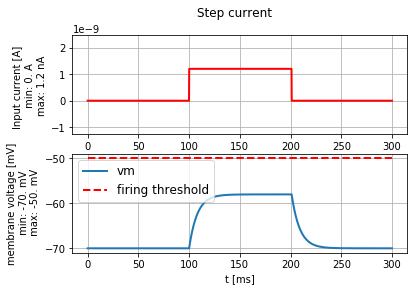

nr of spikes: 5


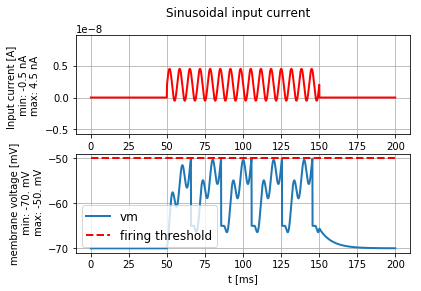

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [7]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools


LIF.getting_started()
LIF.print_default_parameters()

# 2.1 Exercise: minimal current
## 2.1.1. Question: minimal current (calculation) 
#### [2 points]

In [8]:
from neurodynex.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -70. mV


Calculate i_min here (write down your formula)

In [9]:
print("reset voltage: {}".format(LIF.V_RESET))
print("firing threshold: {}".format(LIF.FIRING_THRESHOLD))

reset voltage: -65. mV
firing threshold: -50. mV


Amplitude = (Firing theshold - reset voltage)/(2 * membrane resistance) <br>
i_min = 2 * amplitude = (Firing threshold - reset volage)/membrane resistance

In [27]:
i_min = (LIF.FIRING_THRESHOLD - LIF.V_REST)/LIF.MEMBRANE_RESISTANCE
print("minimal current: {}".format(i_min))

minimal current: 2. nA


## 2.1.2. Question: minimal current (simulation)
#### [2 points]

nr of spikes: 0


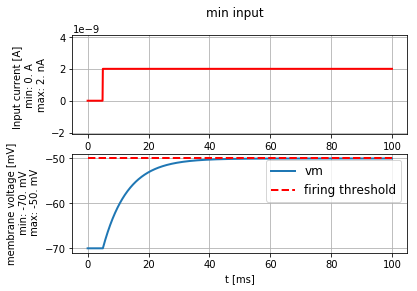

In [11]:
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude= i_min)  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

# 2.2. Exercise: f-I Curve 
## 2.2.1. Question: f-I Curve and refractoryness


1 - Sketch or plot the curve with some program. You don't have to include it here, it is just for your understanding and will not be graded.

2 - What is the maximum rate at which this neuron can fire?
#### [3 points]

In [12]:
def dichotomy(left, right, objective):
    mid = (right+left)//2
    (state_monitorl,spike_monitorl) = LIF.simulate_LIF_neuron(input_current=currents[left], simulation_time = 500 * b2.ms,
                                                             abs_refractory_period= 3*b2.ms)
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=currents[mid], simulation_time = 500 * b2.ms,
                                                           abs_refractory_period= 3*b2.ms)
    (state_monitorr,spike_monitorr) = LIF.simulate_LIF_neuron(input_current=currents[right], simulation_time = 500 * b2.ms,
                                                             abs_refractory_period= 3*b2.ms)

    a = spike_monitorl.count[0]
    m = spike_monitor.count[0]
    b = spike_monitorr.count[0]
    
    
    if(mid == left or mid == right):
        if(a == objective):
            return(left, left, True)
        else:
            return(right, right, True)
    
    if(a == objective):
        return (left, left, True)
    
    if(a <= m and m < objective):
        return (mid, right, False)
    
    if(a < m and m == objective):
        return (left, mid, False)
    else:
        print("Unplanned case, will result in None type error!")
        print("Indices: {}, {}, {}".format(left, mid, right))
        print("Values: {}, {}, {}, {}".format(a,m,b, objective))

In [13]:
from brian2.units import *

r = np.arange(0, 100,step=2)
l = [] 
for x in np.nditer(r, op_flags=['readwrite']):
    l.append(x*nA)
    
currents = []

for li in l:
    currents.append(input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude= li))

In [14]:
maxSpikes = -1
max_i = len(currents)
i_left = 0
i_right = max_i-1
found = False
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=currents[i_right], simulation_time = 500 * b2.ms,
                                                       abs_refractory_period= 3*b2.ms)
good_i = i_right
spikeObj = spike_monitor.count[0]
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=currents[i_left], simulation_time = 500 * b2.ms,
                                                        abs_refractory_period= 3*b2.ms)


foundId = i_right

if(spike_monitor.count[0] == spikeObj):
    found = True
    foundId= i_left

while(not found):
    print("i_left: {}, i_right: {}".format(i_left, i_right))
    (i_left, i_right, found) = dichotomy(i_left, i_right, spikeObj)


i_left: 0, i_right: 49
i_left: 24, i_right: 49
i_left: 24, i_right: 36
i_left: 30, i_right: 36
i_left: 30, i_right: 33
i_left: 30, i_right: 31


In [15]:
if(found):
    foundId = i_left

nr of spikes: 31


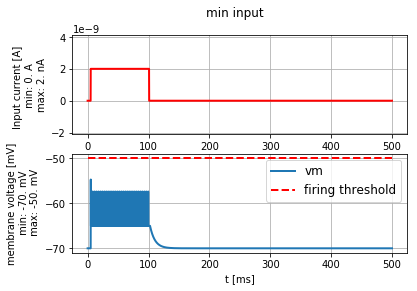

In [16]:
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=currents[foundId], simulation_time = 500 * b2.ms,
                                                       abs_refractory_period= 3*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

The maximum rate at which the neuron can fire is 31/0.1s = 310 Hz

3 - Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. 
For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. 
#### [4 points]

In [28]:
spikes = []
for c in currents:
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current= c, simulation_time = 500 * b2.ms,
                                                       abs_refractory_period= 3*b2.ms)
    spikes.append(spike_monitor.count[0]/0.1)

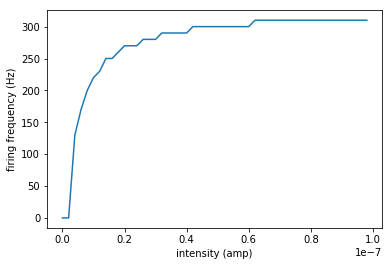

In [29]:
import matplotlib.pyplot as plt

plt.plot(l, spikes)
plt.ylabel('firing frequency (Hz)')
plt.xlabel('intensity (amp)')
plt.show()

# 2.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron
## 2.3.1. Question: “Read” the LIF parameters out of the vm plot
#### [6 points]

In [30]:
def randomSimulation(t_start_, t_end_, amplitude_):
     #get a random parameter. provide a random seed to have a reproducible experiment
    random_parameters = LIF.get_random_param_set(random_seed=432)

     #define your test current
    test_current = input_factory.get_step_current(
    t_start= t_start_, t_end= t_end_, unit_time=b2.ms, amplitude= amplitude_ * b2.namp)

     #probe the neuron. pass the test current AND the random params to the function
    state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

     #plot
    plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

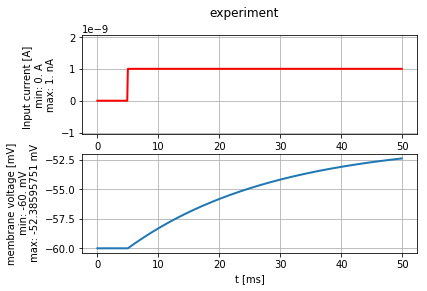

In [31]:
randomSimulation(5,100,1.)

With this simulation, we can see that the resting potential is - 60.0 mV.  Parameters are:
<br>Resting potential: -60. mV
<br>Reset voltage: ?
<br>Firing threshold: ?
<br>Membrane resistance: ?
<br>Membrane time-scale: ?
<br>Absolute refractory period: ?

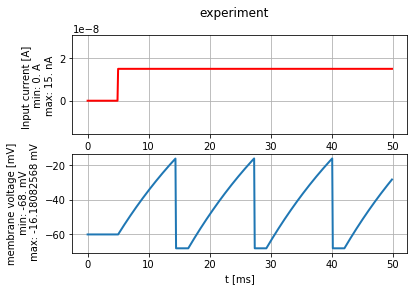

In [32]:
randomSimulation(5,100,15)

The firing threshold seems to be around -16 mV. Let us run more simulations to get it accurately. The reset voltage is -68 mV. Parameters are:
<br>Resting potential: -60. mV
<br>Reset voltage: -68. mV
<br>Firing threshold: ?
<br>Membrane resistance: ?
<br>Membrane time-scale: ?
<br>Absolute refractory period: ?

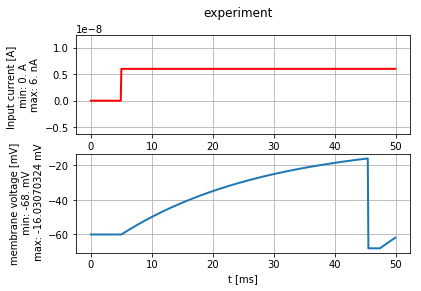

In [33]:
randomSimulation(5,100,6)

From this simulation, we can reasonably estimate that the firing threshold is -16 mV
Parameters are:
<br>Resting potential: -60. mV
<br>Reset voltage: -68. mV
<br>Firing threshold: -16. mV
<br>Membrane resistance: ?
<br>Membrane time-scale: ?
<br>Absolute refractory period: ?

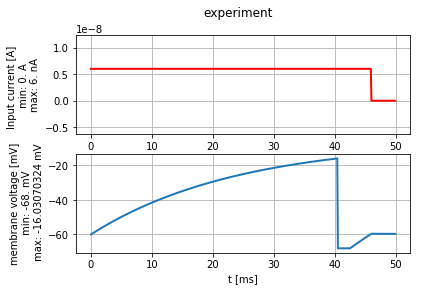

In [34]:
randomSimulation(0,45,6)

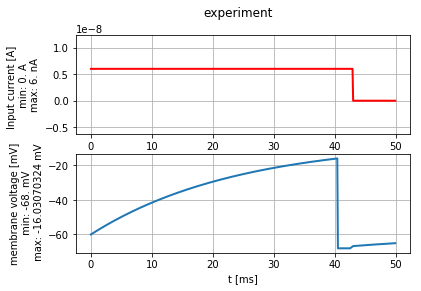

In [35]:
randomSimulation(0,42,6)

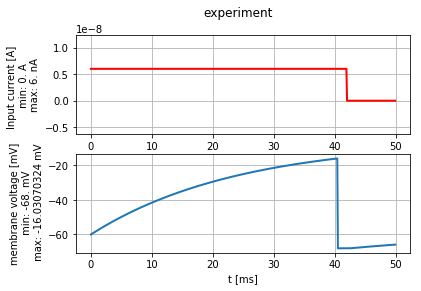

In [36]:
randomSimulation(0,41,6)

It fires for 42 ms but not 41 ms. Therefore the absolute refactory period is 2 ms!
Parameters are:
<br>Resting potential: -60. mV
<br>Reset voltage: - 68. mV
<br>Firing threshold: - 16. mV
<br>Membrane resistance: ?
<br>Membrane time-scale: ?
<br>Absolute refractory period: 2. ms

(urest - u)  + RI = 0 <=> R = (u-urest)/I

# 2.4. Exercise: Sinusoidal input current and subthreshold response
## 2.4.1. Question
#### [5 points]

nr of spikes: 0


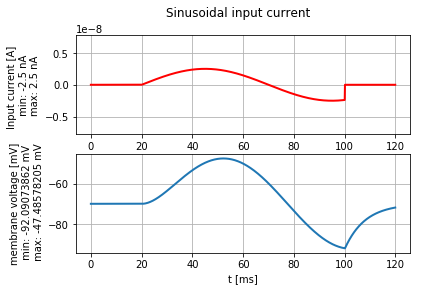

In [37]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, 
                                                         firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

Amplitude= (-68 + 72 )/2 = 2 mV <br> <br>
We can see that the signals are in phase. Take for instance the region between 80 and 100 ms. In both the input current and the membrane voltage, there are four spikes. They do not cross zero at the same time. Take for instance 40 ms. The current is at roughly 0 nA, whereas the membrane voltage is at -72 mV, whihc is close to its minimum.
<br> __Amplitude__ = 2 mV <br> __Phase__ = ?

In [58]:
def computePhase(vector1, vector2):
    ## the angle between two vectors a and b when they are complex can be seen as cos(theta) = (a.b*)/(||a||*||b||)
    ## theta can be retrieved by acos afterwards
    ## theta is the phase in radians, as arccos returns a result in radians
    ## the inversion between vector1 and vector2 is because numpy transforms the first argument as its complex conjugate
    return np.arccos(np.vdot(vector2,vector1)/(np.linalg.norm(vector1)*np.linalg.norm(vector2)))

In [23]:
from scipy import signal

start = 600
end = 700

a= state_monitor.v[0][start:end]
b = sinusoidal_current.values[start:end].flatten()

theta = computePhase(a,b)

In [24]:
phase_shift = theta*180/(np.pi)
phase_shift

100.34587363878924

It follows that:
<br> __Amplitude__ = 2 mV <br> __Phase__ = 100.3°

## 2.4.2. Question
#### [5 points]

In [43]:
def runLIFWithFrequency(freq):
     # note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                                amplitude= 2.5 * b2.namp, frequency=freq*b2.Hz,
                                                direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, 
                                                             firing_threshold=0*b2.mV)
    return (state_monitor, spike_monitor, sinusoidal_current)

In [44]:
def getVoltagesFromLIF(freq):
    (state_monitor, spike_monitor, sinusoidal_current) = runLIFWithFrequency(freq)
    return state_monitor.v

In [45]:
def getVoltagesAndCurrentsFromLIF(freq):
    (state_monitor, spike_monitor, sinusoidal_current) = runLIFWithFrequency(freq)
    return (state_monitor.v, sinusoidal_current)

In [46]:
def plotWithFrequency(freq):
   
    (state_monitor, spike_monitor, sinusoidal_current) = runLIFWithFrequency(freq)
    # plot the membrane voltage
    plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
    print("nr of spikes: {}".format(spike_monitor.count[0]))

In [88]:
r = np.arange(10,1100,step=100)
amplitudes = np.empty((0,0))

for frequency in r:
    volt = getVoltagesFromLIF(frequency)[0]
    s = volt.shape[0]/2
    leftIdx = int(s//1000 * frequency)
    #vList = volt[leftIdx:1199-leftIdx//2]
    #vList = (getVoltagesFromLIF(frequency))[0][600:800]
    vList = volt[0:1199]
    v_min = np.amin(vList)
    v_max = np.amax(vList)
    amplitudes = np.append(amplitudes, (v_max - v_min)/2.0)

In [89]:
# For input frequencies between 10Hz and 1kHz plot the the resulting amplitude of subthreshold oscillations of the 
# membrane potential vs. input frequency.

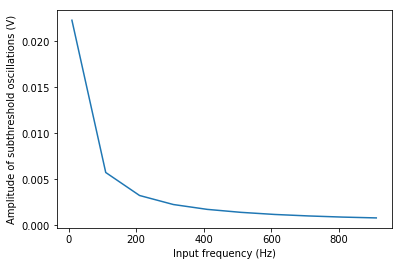

In [90]:
plt.plot(r, amplitudes)
plt.ylabel('Amplitude of subthreshold oscillations (V)')
plt.xlabel('Input frequency (Hz)')
plt.show()

## 2.4.3. Question
#### [5 points]

In [32]:
# For input frequencies between 10Hz and 1kHz
# plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency.

In [98]:
shifts = np.empty((0,0))
r = np.arange(10,1100,step=100)

for frequency in r:
    (vList, currents) = getVoltagesAndCurrentsFromLIF(frequency)
    s = vList[0].shape[0]/2
    leftIdx = int(s * frequency)//1000
    shifts = np.append(shifts, computePhase(vList[0][500:1000], currents.values[500:1000].flatten()))

nr of spikes: 0


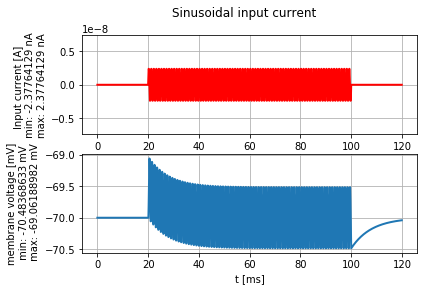

In [99]:
plotWithFrequency(1000)

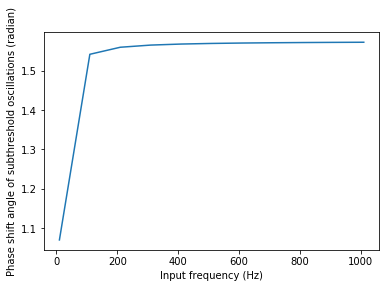

In [100]:
plt.plot(r, shifts)
plt.ylabel('Phase shift angle of subthreshold oscillations (radian)')
plt.xlabel('Input frequency (Hz)')
plt.show()

## 2.4.4. Question
#### [3 points]

As we can see, the amplitude is decreasing with frequency. The modulus of the filter depends on the amplitude; as it is higher for low frequencies than for high frequencies (where it tends to 0), it is a __low pass__ filter.

# 2.5  Leaky integrate-and-fire neuron with noisy input
This exercise is not available online. All information is given here.
So far you have explored the leaky integrate-and-fire model with step and sinusoidal input currents. We will now investigate the same neuron model with noisy input.
The voltage equation now is:
\begin{eqnarray}
\tau \frac{du}{dt} = -u(t) + u_{rest} + RI(t) + RI_{noise}(t)
\end{eqnarray}
where the noise is simply an additional term.

To implement the noise term in the above equation we will consider it as 'white noise', $I_{noise}(t) = \sigma \xi(t)$. White noise $\xi$ is a stochastic process with expectation value $<\xi(t)>=0$ and autocorrelation $<\xi(t)\xi(t+\Delta)>=\delta(\Delta)$ Note that, as we saw in the Exercise set of Week 1, the $\delta$-function has units of $1/time$, so $\xi$ has units of $1/\sqrt{time}$.

It can be shown that the discrete time implementation of a noisy voltage trajectory is:
\begin{eqnarray}
du = (-u(t) + u_{rest} + RI(t))\frac{dt}{\tau} + \frac{R}{\tau}\sigma \sqrt{dt}\ y,
\end{eqnarray}
where $y \sim \mathcal{N}(0, 1)$

We can then write, again for implementational purposes:
\begin{eqnarray}
du = \big[-u(t) + u_{rest} + R(I(t) + \sigma \frac{1}{\sqrt{dt}} y) \big]\frac{dt}{\tau}
\end{eqnarray}


Note that for the physical units to be consistent $\sigma$ in our formulation has units of $current * \sqrt{time}$. 

Details of the above are beyond the scope of this exercise. If you would like to get more insights we refer to the paragraph 8.1 of the book (http://neuronaldynamics.epfl.ch/online/Ch8.S1.html), to http://www.scholarpedia.org/article/Stochastic_dynamical_systems#Ornstein-Uhlenbeck_process and regarding the implementational scaling of the noise to http://brian2.readthedocs.io/en/stable/user/models.html#time-scaling-of-noise.

### 2.5.1 Noisy step input current

#### [7 points]
1 - Implement the noisy current $I_0 + I_{noise}$ as described above. In order to do this edit the function get_noisy_step_current provided below. This is simply a copy of the code of the function get_step_current that you used earlier, and you just need to add the noisy part of the current at the indicated line (indicated by "???").

Then create a noisy step current with amplitude $I_0 = 1.5nA$ and $\sigma = 1 nA* \sqrt{\text{your time unit}}$ (e.g.: time_unit = 1 ms), run the LIF model and plot the input current and the membrane potential, as you did in the previous exercises.

nr of spikes: 3


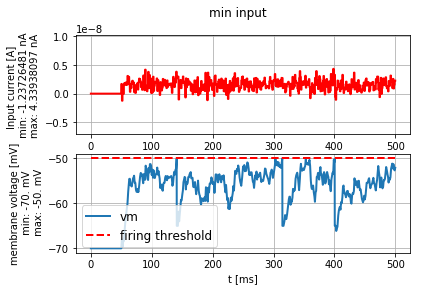

In [5]:
def get_noisy_step_current(t_start, t_end, unit_time, amplitude, sigma, append_zero=True):

    """Creates a step current with added noise. If t_start == t_end, then a single
    entry in the values array is set to amplitude.

    Args:
        t_start (int): start of the step
        t_end (int): end of the step
        unit_time (Quantity, Time): unit of t_start and t_end. e.g. 0.1*brian2.ms
        amplitude (Quantity): amplitude of the step. e.g. 3.5*brian2.uamp
        sigma (float): amplitude (std) of the noise. e.g. 0.1*b2.uamp
        append_zero (bool, optional): if true, 0Amp is appended at t_end+1.
        Without that trailing 0, Brian reads out the last value in the array (=amplitude) for all indices > t_end.

    Returns:
        TimedArray: Brian2.TimedArray
    """

    assert isinstance(t_start, int), "t_start_ms must be of type int"
    assert isinstance(t_end, int), "t_end must be of type int"
    assert b2.units.fundamentalunits.have_same_dimensions(amplitude, b2.amp), \
        "amplitude must have the dimension of current e.g. brian2.uamp"

    tmp_size = 1 + t_end  # +1 for t=0
    if append_zero:
        tmp_size += 1
    tmp = np.zeros((tmp_size, 1)) * b2.amp
    
    tmp[t_start:t_end] = amplitude + sigma*np.random.randn(t_end-t_start,1)/np.sqrt(unit_time)
    # Use np.random.randn(...) for generating random numbers
    # Pay attention the correct scaling (variance) of the noise with respect to unit_time (see formulas above)
    
    curr = b2.TimedArray(tmp, dt= unit_time)
    return curr

# -------------------
amplitude = 1.5*b2.nA
time_unit = 1.*b2.ms
time_step = 1.*b2.ms
sigma = 1.0*b2.nA*np.sqrt(time_step)

# Create a noisy step current
noisy_step_current = get_noisy_step_current(t_start=50, t_end=500, unit_time = time_step,
                                            amplitude= amplitude, sigma = sigma)

# Run the LIF model
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=noisy_step_current, \
                                                        simulation_time = 500*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, noisy_step_current, title="min input", \
                                           firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

2 - How does the neuron behave? Discuss your result. Your answer should be max 3 lines long.

It is in subthreshold regime, as it does not spike.

### 2.5.2 Subthreshold vs. superthreshold regime
#### [7 + 5 = 12 points]
1 - A time-dependent input current $I(t)$ is called subthreshold if it does not lead to spiking, i.e. if it leads to a membrane potential that stays - in the absence of noise - below the firing threshold. When noise is added, however, even subthreshold stimuli can induce spikes. Input stimuli that lead to spiking even in a noise-free neuron are called superthreshold. Sub- and superthreshold inputs, in the presence and absence of noise give rise to different spiking behaviour. These 4 different regimes (sub, super, noiseless, noisy) are what we will explore in this exercise.

Create a function that takes the amplitudes of a step current and the noise as arguments. It should simulate the LIF-model with this input, calculate the interspike intervals (ISI) and plot a histogram of the ISI (the interspike interval is the time interval between two consecutive spikes).

In order to do so edit the function test_effect_of_noise provided below. A few more details:
* Use the function spike_tools.get_spike_train_stats (http://neuronaldynamics-exercises.readthedocs.io/en/latest/_modules/neurodynex/tools/spike_tools.html#get_spike_train_stats) to get the ISI. Have a look at its source code to understand how to use it and what it returns. You may need to use other parts of the documentation as well.
* You will need to simulate the neuron model for long enough to get some statistics.
* Optional and recommended: What would you expect the resulting histograms to look like?

2 - Run your function and create the ISI histograms for the following four regimes:
* No noise, subthreshold: $I_0 = 1.9nA$, $\sigma = 0 nA* \sqrt{\text{your time unit}}$
* Noise, subthreshold regime: $I_0 = 1.9nA$, $\sigma = 1 nA* \sqrt{\text{your time unit}}$
* No noise, superthreshold regime: $I_0 = 2.5nA$, $\sigma = 0 nA* \sqrt{\text{your time unit}}$
* Noise, superthreshold regime: $I_0 = 2.5nA$, $\sigma = 1 nA* \sqrt{\text{your time unit}}$

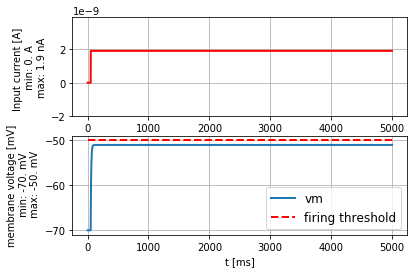

nr of spikes: 0


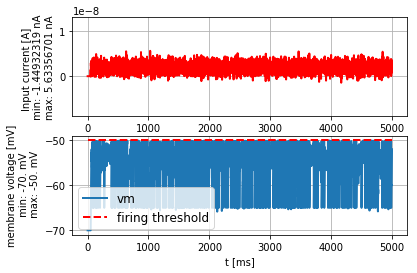

nr of spikes: 169


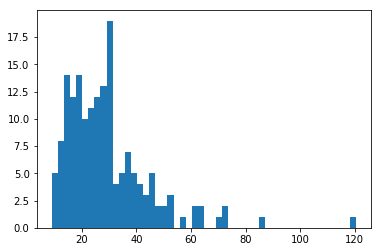

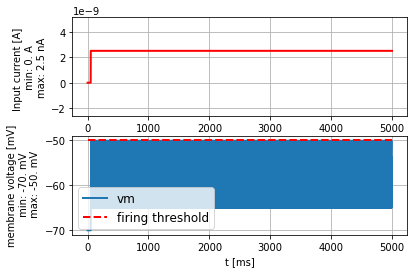

nr of spikes: 379


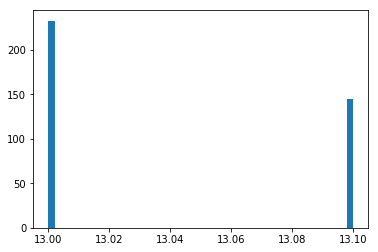

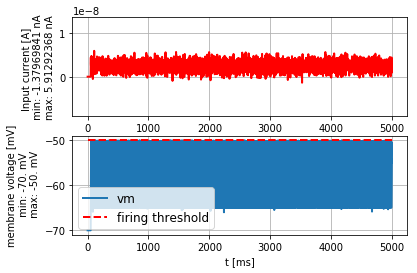

nr of spikes: 382


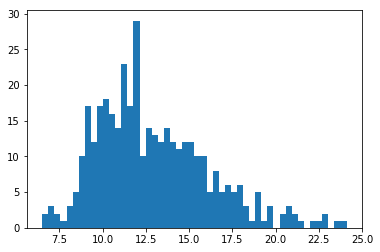

In [41]:
from neurodynex.tools import spike_tools, plot_tools

# time unit. e.g.
time_unit = 1.*b2.ms
time_step = time_unit

def test_effect_of_noise(amplitude, sigma, nr_of_bins = 50):
    
    # Create a noisy step current 
    noisy_step_current = get_noisy_step_current(t_start=50, t_end=5000, unit_time = time_step,
                                                amplitude= amplitude, sigma = sigma)
    
    # Run the LIF model
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=noisy_step_current, \
                                                            simulation_time = 5000 * b2.ms)

    plt.figure()
    plot_tools.plot_voltage_and_current_traces(state_monitor, noisy_step_current, title="", \
                                              firing_threshold=LIF.FIRING_THRESHOLD)
    plt.show()
    
    print("nr of spikes: {}".format(spike_monitor.count[0]))
    
    # Use the function spike_tools.get_spike_train_stats
    spike_stats = spike_tools.get_spike_train_stats(spike_monitor, 50*b2.ms)
    
    # Make the ISI histogram
    if len(spike_stats._all_ISI) != 0:
        plt.hist(spike_stats._all_ISI/b2.ms, nr_of_bins)
        # choose an appropriate window size for the x-axis (ISI-axis)!
        plt.show()
        
    return spike_stats

sigma_unit = 1.0*b2.nA*np.sqrt(time_step)

subthresh_amp = 1.9*b2.nA
superthresh_amp = 2.5*b2.nA

no_noise_sigma = 0.0*sigma_unit
noisy_sigma= 1.0*sigma_unit

# 1. No noise, subthreshold
stats1 = test_effect_of_noise(amplitude = subthresh_amp, sigma = no_noise_sigma)

# 2. Noise, subthreshold regime
stats2 = test_effect_of_noise(amplitude = subthresh_amp, sigma = noisy_sigma)

# 3. No noise, superthreshold regime
stats3 = test_effect_of_noise(amplitude = superthresh_amp, sigma = no_noise_sigma)

# 4. Noise, superthreshold regime
stats4 = test_effect_of_noise(amplitude = superthresh_amp, sigma = noisy_sigma)

2 - Discuss your results (ISI histograms) for the four regimes. For help and inspiration, as well as for verification of your results, have a look at the book chapter 8.3 (http://neuronaldynamics.epfl.ch/online/Ch8.S3.html). Your answer should be max 5 lines long.
#### [5 points]

In stats1, the neuron is in subthreshold regime and doesn't fire. There is no histogram to plot (no spike)
In stats2, the neuron spikes 

Write your answer here.

3 - For the ISI histograms you needed to simulate the neuron for a long time to gather enought statistics for the ISI. If you wanted to parallelize this procedure in order to reduce the computation time (e.g. you have multiple CPU cores on your machine), what would be a simple method to do that? Your answer should be max 3 lines long.

Hint: Temporal vs. ensemble average...
#### [2 points]

We can run one neuron per core and then combine the results, ie an ensemble average. The speedup compared to running N neurons on one core would be the number of cores (not accounting for the overhead to parallelize and combine back). Ensemble average would therefore be more efficient.

### 2.5.3 Noisy sinusoidal input current
Implement the noisy sinusoidal input current $I(t) + I_{noise}$. As before, edit the function provided below; you only have to add the noisy part ot the current.

Then create a noisy sinusoidal current with amplitude = $2.5nA$, frequency = $100Hz$, $\sigma = 1 nA* \sqrt{\text{your time unit}}$ and direct_current = $1.5nA$, run the LIF model and plot the input current and the membrane potential, as you did in the previous exercises. What do you observe when compared to the noiseless case ($\sigma = 0 nA*\sqrt{\text{your time unit}}$)?
#### [5 points]

nr of spikes: 5


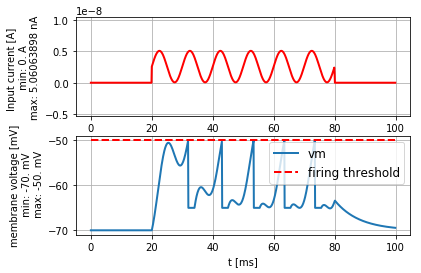

In [75]:
import math

def get_noisy_sinusoidal_current(t_start, t_end, unit_time,
                           amplitude, frequency, direct_current, sigma, phase_offset=0.,
                           append_zero=True):
    """Creates a noisy sinusoidal current. If t_start == t_end, then ALL entries are 0.

    Args:
        t_start (int): start of the sine wave
        t_end (int): end of the sine wave
        unit_time (Quantity, Time): unit of t_start and t_end. e.g. 0.1*brian2.ms
        amplitude (Quantity, Current): maximum amplitude of the sinus e.g. 3.5*brian2.uamp
        frequency (Quantity, Hz): Frequency of the sine. e.g. 0.5*brian2.kHz
        direct_current(Quantity, Current): DC-component (=offset) of the current
        sigma (float): amplitude (std) of the noise. e.g. 0.1*b2.uamp
        phase_offset (float, Optional): phase at t_start. Default = 0.
        append_zero (bool, optional): if true, 0Amp is appended at t_end+1. Without that
            trailing 0, Brian reads out the last value in the array for all indices > t_end.


    Returns:
        TimedArray: Brian2.TimedArray
    """
    assert isinstance(t_start, int), "t_start_ms must be of type int"
    assert isinstance(t_end, int), "t_end must be of type int"
    assert b2.units.fundamentalunits.have_same_dimensions(amplitude, b2.amp), \
        "amplitude must have the dimension of current. e.g. brian2.uamp"
    assert b2.units.fundamentalunits.have_same_dimensions(direct_current, b2.amp), \
        "direct_current must have the dimension of current. e.g. brian2.uamp"
    assert b2.units.fundamentalunits.have_same_dimensions(frequency, b2.Hz), \
        "frequency must have the dimension of 1/Time. e.g. brian2.Hz"
    
    tmp_size = 1 + t_end  # +1 for t=0
    if append_zero:
        tmp_size += 1
    tmp = np.zeros((tmp_size, 1)) * b2.amp
    if t_end > t_start:  # if deltaT is zero, we return a zero current
        phi = range(0, (t_end - t_start) + 1)
        phi = phi * unit_time * frequency
        phi = phi * 2. * math.pi + phase_offset
        c = np.sin(phi)
        c = (direct_current + c * amplitude) # add direct current and scale by amplitude
        tmp[t_start: t_end + 1, 0] = c # add sinusoidal part of current
        
        # Add noisy part of current here
        # Pay attention to correct scaling with respect to the unit_time (time_step)
        tmp[t_start:t_end] += sigma*np.random.randn()/np.sqrt(unit_time)
        
    curr = b2.TimedArray(tmp, dt= unit_time)
    return curr
    
# ------------------
amplitude = 2.5*b2.nA
frequency = 100.*b2.Hz
time_unit = 1.*b2.ms
time_step = 0.1*b2.ms # This is needed for higher temporal resolution 
sigma = 1.*b2.nA*np.sqrt(time_step)
direct_current = 1.5*b2.nA


# Create a noisy sinusoidal current
noisy_sinusoidal_current = get_noisy_sinusoidal_current(200, 800, unit_time = time_step,
                                           amplitude= amplitude, frequency=frequency,
                                          direct_current=direct_current, sigma = sigma)

# Run the LIF model
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=noisy_sinusoidal_current, \
                                                        simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, noisy_sinusoidal_current, title="", \
                                           firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 0


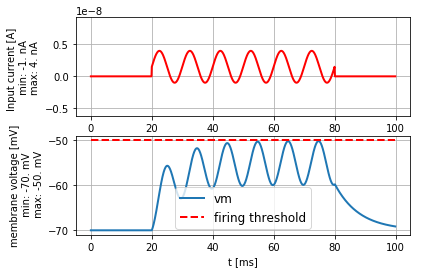

In [77]:
noiseless_sigma = 0.*b2.nA*np.sqrt(time_step)
amplitude = 2.5*b2.nA
frequency = 100.*b2.Hz
time_unit = 1.*b2.ms
time_step = 0.1*b2.ms # This is needed for higher temporal resolution 
direct_current = 1.5*b2.nA


# Create a noisy sinusoidal current
noisy_sinusoidal_current = get_noisy_sinusoidal_current(200, 800, unit_time = time_step,
                                           amplitude= amplitude, frequency=frequency,
                                          direct_current=direct_current, sigma = noiseless_sigma)

# Run the LIF model
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=noisy_sinusoidal_current, \
                                                        simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, noisy_sinusoidal_current, title="", \
                                           firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

__Observation__ : The neuron actually appears to fire in the presence of noise, whereas it simply oscillates in subthreshold regim in absence of noise.

### 2.5.4 Stochastic resonance (Bonus, not graded)
Contrary to what one may expect, some amount of noise under certain circumstances can improve the signal transmission properties of neurons. In the subthreshold regime, a neuron cannot transmit any information about the temporal structure of its input since it does not spike. With some noise, there is some probability to spike, with the probability depending on the time dependent input (inhomogeneous Poisson process). However to much noise covers the signal completely and thus, there is usually an optimal value for the amplitude of the noise. This phenomenon is called "stochastic resonance" and we will briefly touch upon it in this exercise. To get an idea of the effect we suggest reading section 9.4.2 in the book: http://neuronaldynamics.epfl.ch/online/Ch9.S4.html.

1 - Simulate several (e.g. n_inits = 5) trials of a LIF neuron with noisy sinusoidal current. For each trial calculate the power spectrum of the resulting spike train (using the function spike_tools.get_averaged_single_neuron_power_spectrum). Finally calculate the average power spectrum and plot it. With appropriate noise amplitudes, you should see a pronounced peak at the driving frequency, while without noise we don't see anything in the power spectrum since no spike was elicited in the subthreshold regime we are in. 

In order to do that use the provided parameters and edit the code provided below. Complete the function _run_sim() which creates the input current, runs a simulation and computes the power spectrum. Call it in a loop to execute several trials. Then average over the spectra to obtain a smooth spectrum to plot.

In [ ]:
amplitude = 1.*b2.nA
frequency = 20*b2.Hz
time_unit = 1.*b2.ms
time_step = .1*b2.ms
direct_current = 1. * b2.nA
sampling_frequency = .01/time_step
noise_amplitude = 2.
n_inits = 5

# run simulation and calculate power spectrum
def _run_sim(amplitude, noise_amplitude):
    noisy_sinusoidal_current = get_noisy_sinusoidal_current(50, 100000, unit_time = time_step,
                                               amplitude= ???, frequency= ???,
                                                            direct_current= ???,
                                                            sigma = noise_amplitude*b2.nA*np.sqrt(time_unit))
    # run the LIF model
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=noisy_sinusoidal_current, \
                                                            simulation_time = 10000 * b2.ms)
    # get power spectrum
    freq, mean_ps, all_ps_dict, mean_firing_rate, mean_firing_freqs_per_neuron = \
    spike_tools.get_averaged_single_neuron_power_spectrum(spike_monitor, sampling_frequency,
                                                 window_t_min = 1000*b2.ms, window_t_max = 9000*b2.ms,
                                                nr_neurons_average=1, subtract_mean=True)
    
    return freq, all_ps_dict, mean_firing_rate


# initialize array
spectra = []
# run a few simulations, calculate the power spectrum and append it to the spectra array
for i in ???:
    freq, spectrum, mfr = ???
    spectra.append(spectrum[0])

# average spectra over trials
spectrum = ??? # hint: us np.mean with axis=0

# plotting, frequencies vs the obtained spectrum:
plt.figure()
plt.plot(???,???)
plt.xlabel("???")
plt.ylabel("???")

2 - We now apply different noise levels to investigate the optimal noise level of stochastic resonance. 

The quantity to optimize is the signal-to-noise ratio (SNR). Here, the SNR is defined as the intensity of the power spectrum at the driving frequency (the peak from above), divided by the value of the background noise (power spectrum averaged around the peak).

In order to do that edit the code provided below. You can re-use the function _run_sim() to obtain the power spectrum of on trial. The calculation of the SNR is already implemented and doesn't need to be changed.

When you are done with completing the code, run the simulation with the proposed parameters (This could take several minutes...). The result should be a plot showing an optimal noise amplitude, i.e. a $\sigma$ where the SNR is maximal.

In [ ]:
def get_snr(amplitude, noise_amplitude, n_inits):
    
    spectra = []
    snr = 0.
    for i in range(0,n_inits):
        # run model with noisy sinusoidal 
        freq_signal, spectrum, mfr = ???
        spectra.append(spectrum[0])

    # Average over trials to get power spectrum
    spectrum = ???

    if mfr != 0.*b2.Hz:
        peak = np.amax(spectrum)
        index_of_peak = np.argmax(spectrum)
        # snr: divide peak value by average of surrounding values
        snr = peak/np.mean(np.concatenate((spectrum[index_of_peak-100:index_of_peak-1],\
                                           spectrum[index_of_peak+1:index_of_peak+100])))
    else:
        snr = 0.
        
    return snr

noise_amplitudes = np.arange(0.,5.,.5)
snr = np.zeros(len(noise_amplitudes))
for j in np.arange(0,len(noise_amplitudes)):
    snr[j] = get_snr(amplitude, noise_amplitudes[j], n_inits = 8)


plt.figure()
plt.plot(noise_amplitudes,snr)
plt.xlabel("???")
plt.ylabel("???")
plt.show()

3 - For further reading on this topic, consult the book chapter 9.4.2 (http://neuronaldynamics.epfl.ch/online/Ch9.S4.html#Ch9.F10).